#Plotting weather patterns in West Africa from 2005 to 2015

####Georges BODIONG

This project is part of a MOOC- Applied Plotting, Charting & Data Representation in Python offered by the University of Michigan. The dataset contains daily climate records from stations on around the world. I took particular interest in West and Central African countries. 

The project implementation is in python27.

###Let's load and preview our data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('ghcn_daily.csv')
df.head()

,ID,Date,Element,Data_Value
0,NG000001052,3/23/2011,TMIN,226
1,GBM00064550,5/8/2013,TMIN,230
2,MLM00061240,1/26/2008,TMAX,280
3,GHM00065439,9/16/2009,TMIN,190
4,MLM00061240,6/22/2011,TMIN,315


As we can see, the dataset contains observations from multiple locations in different countries. Let's do some data munging to extract the data we want for our visualization.

In [2]:
#Let's start by defining a multi-index to help us for data grouping
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = pd.DatetimeIndex(df['Date']).day 
df['Month'] = pd.DatetimeIndex(df['Date']).month 
df['Year'] = pd.DatetimeIndex(df['Date']).year
df = df.set_index(['Month','Day']) 
df.sort_index(inplace = True)

#We convert temperatures to degrees celsius
def to_degrees(x):
    t = x * 0.1
    return t

df['Data_Value'] = df['Data_Value'].map(to_degrees)

df.head()

ID       Date Element  Data_Value  Year
Month Day                                                  
1     1    TO000005380 2015-01-01    TMIN        17.2  2015
      1    TO000005380 2015-01-01    TMAX        36.5  2015
      1    IVM00065545 2015-01-01    TMIN        18.8  2015
      1    IVM00065545 2015-01-01    TMAX        34.0  2015
      1    GHM00065467 2015-01-01    TMAX        30.5  2015

In [3]:
#Let's consider leap years and discard all entries for 29th february
leaps = df.loc[2,29]
df = df[~df.index.isin(leaps.index)]

In [9]:
#We need two dataframes: one spanning 2005 to 2014 and another for 2015 observations
#Let's do the splitting job
up_to_2014 = df[df['Year'] != 2015]
wa_2015 = df[df['Year'] == 2015]

#Let's split the 'up_to_2014' dataframe in two: one with min values and the other with max values
minvals = up_to_2014[up_to_2014['Element'] == 'TMIN']
maxvals = up_to_2014[up_to_2014['Element'] == 'TMAX']

max_temp = pd.DataFrame(maxvals.groupby(level = ['Month', 'Day'])['Data_Value'].max())
min_temp = pd.DataFrame(minvals.groupby(level = ['Month', 'Day'])['Data_Value'].min())


In [15]:
minvals.head()

ID       Date Element  Data_Value  Year
Month Day                                                  
1     1    NGM00061045 2010-01-01    TMIN        14.0  2010
      1    UVM00065518 2010-01-01    TMIN        18.5  2010
      1    TO000005376 2010-01-01    TMIN        22.4  2010
      1    GHM00065459 2010-01-01    TMIN        22.4  2010
      1    MLM00061240 2010-01-01    TMIN        19.9  2010

<IPython.core.display.Javascript object>


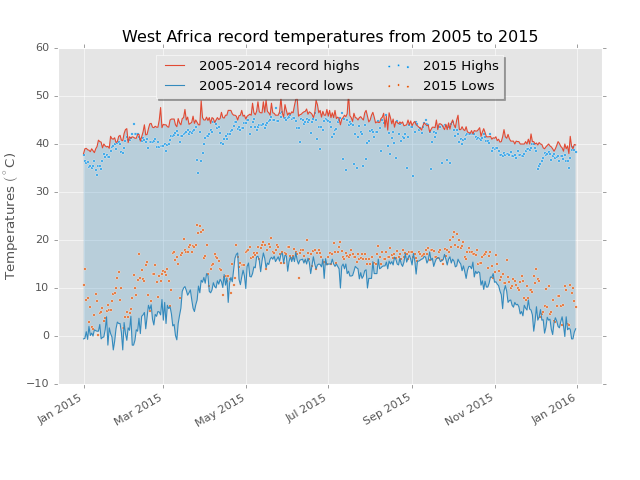

In [46]:
import matplotlib.dates as dates
import matplotlib.ticker as ticker
%matplotlib notebook

plt.style.use('ggplot')


date_range = wa_2015['Date'].unique()
#date_range = np.arange('2015-01-01', '2016-01-01', dtype='datetime64[D]')
fig, ax = plt.subplots()
ax.set_title('West Africa record temperatures from 2005 to 2015')
ax.set_ylabel('Temperatures $(^{\circ}$C)')
#ax.yaxis.grid()

plt.plot(date_range, max_temp['Data_Value'], linewidth=1)
plt.plot(date_range, min_temp['Data_Value'], linewidth=1)
plt.fill_between(date_range, min_temp['Data_Value'], max_temp['Data_Value'], alpha=0.25)

label_2015_max = '2015 Highs'
label_2015_min = '2015 Lows'

plt.scatter(date_range, max_2015['Data_Value'], c = '#0091EA', marker = '.', label = label_2015_max)
plt.scatter(date_range, min_2015['Data_Value'], c = '#E65100', marker = '.', label = label_2015_min)

ax.legend(['2005-2014 record highs', '2005-2014 record lows', label_2015_max, label_2015_min], loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
fig.subplots_adjust(left=0.09,bottom=0.16, right=0.94,top=0.90, wspace=0.2, hspace=0)
fig.autofmt_xdate()

In [22]:
#Let's also work with 2015 data
maxvals_2015 = wa_2015[wa_2015['Element'] == 'TMAX']
minvals_2015 = wa_2015[wa_2015['Element'] == 'TMIN']

max_2015 = pd.DataFrame(maxvals_2015.groupby(level = ['Month', 'Day'])['Data_Value'].max())
min_2015 = pd.DataFrame(minvals_2015.groupby(level = ['Month', 'Day'])['Data_Value'].min())

#For the sake of comparison, let's join the respective minimum and maximum datasets
max_df = max_temp.join(max_2015, how='inner', lsuffix='_up_to_2014', rsuffix='_2015')
min_df = min_temp.join(min_2015, how='inner', lsuffix='_up_to_2014', rsuffix='_2015')

In [18]:
max_df.head()

Data_Value_up_to_2014  Data_Value_2015
Month Day                                        
1     1                     38.0             37.8
      2                     39.0             36.5
      3                     39.1             36.0
      4                     38.8             36.2
      5                     38.7             35.2